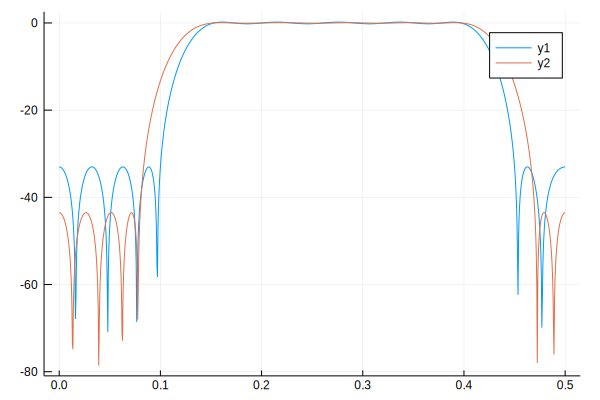

In [14]:
using DSP
using Plots

bpass = remez(35, [(0, 0.1)=>0, (0.15, 0.4)=>1, (0.45, 0.5)=>0]);
bpass2 = remez(35, [(0, 0.08)=>0, (0.15, 0.4)=>1, (0.47, 0.5)=>0]);

b = DSP.Filters.PolynomialRatio(bpass, [1.0])
b2 = DSP.Filters.PolynomialRatio(bpass2, [1.0])

f = range(0, stop=0.5, length=1000)

plot(f, 20*log10.(abs.(freqz(b,f,1.0))))

plot!(f, 20*log10.(abs.(freqz(b2,f,1.0))))

In [27]:
using DSP
include("fir2_filter.jl")

firwin2 (generic function with 1 method)

In [42]:
test = firwin2(150, [0.0, 0.5, 1.0], [1.0, 1.0, 0.0])

test[73:78]

6-element Array{Float64,1}:
 -0.022869610335767968
 -0.06362756379800678 
  0.5731023640981743  
  0.5731023640981711  
 -0.06362756379800824 
 -0.0228696103357668  

In [46]:
f=[0, 0.3, 0.3, 0.6, 0.6, 1]; 
m=[0, 0, 1, 1/2, 0, 0];
firwin2(100,f,m)

100-element Array{Float64,1}:
 -0.0004598547518055902 
 -0.0005256284501073124 
 -0.00018258474043853076
 -0.00016770151443763016
  0.0003915002469771597 
  0.0010955745195245737 
  0.00020439152741828106
 -0.001088313153024371  
 -0.0007678920156812739 
 -0.00029625336165007595
 -0.00014632312440422785
  0.001558443611592481  
  0.0022602347958031025 
  ⋮                     
  0.0015584436115924857 
 -0.00014632312440423124
 -0.00029625336165008803
 -0.000767892015681278  
 -0.0010883131530243615 
  0.00020439152741828927
  0.0010955745195245724 
  0.0003915002469771501 
 -0.00016770151443763713
 -0.00018258474043852312
 -0.0005256284501073012 
 -0.00045985475180559504